In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [24]:
data = datasets.load_breast_cancer()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Feature Scaling
scaler = StandardScaler()
scaler.fit(data.data)

#Split dataset training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=1)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

x_axis = []
y_axis = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    x_axis.append(k) 
    score = cross_val_score(clf, X_train, Y_train, cv=KFold(shuffle=True, random_state=0))
    y_axis.append(score.mean()) 


Max accuracy: 0.9362637362637363 at k = 13


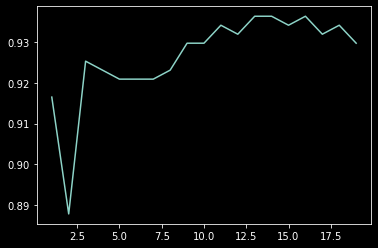

In [6]:
import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis)
plt.style.use("dark_background")
k = x_axis[y_axis.index(max(y_axis))]
print("Max accuracy:", max(y_axis), "at k =", x_axis[y_axis.index(max(y_axis))])
plt.show()

In [16]:
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, Y_train)
score = clf.score(X_test, Y_test)
print("accuracy using sklearn:", score)

accuracy using sklearn: 0.9122807017543859


In [17]:
"""
Neighbour Class
----------------
Stores label and distance from the point to be predicted
"""
class neighbour:
    def __init__(self, label, distance):
        self.label = label
        self.distance = distance
    
    """
    Custom predicate
    """
    def __lt__(self, nxt):
        return self.distance >= nxt.distance

In [18]:
from heapq import heappop, heappush, heappushpop, heapify
from collections import Counter
"""
K-nearest neighbour classifier
--------------------------------
Attributes:
n_neighbours: int 
    number of neighbours to be considered
p: int
    Minkowski parameter
"""

class KNN:
    def __init__(self, p=2, n_neighbours=3):
        self.p = p
        self.n_neighbours = n_neighbours
    
    """
    fit function
    --------------
    Fit the training data
    Parameters:
    X: 2D array
        Features of training data
    Y: 1D array
        Labels of training data
    
    Returns self
    """
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        return self
    
    """
    predict function
    -----------------
    Predict the label for given set of features
    Parameters:
    X: 2D array
        Array of Features of testing data
    
    Returns: array
        Predicted labels
    """
    def predict(self, X):
        X = np.array(X)
        maxHeaps = []
        for i in range(len(self.X)):
            x = self.X[i]
            d = np.sum((X-x)**self.p, axis=1) ** (1/self.p)
            neighbourData = [neighbour(self.Y[i], d[j]) for j in range(len(X))]
            for j in range(len(X)):
                if(len(maxHeaps) <= j):
                    maxHeaps.append([neighbourData[j]])
                    heapify(maxHeaps[j])
                    #print(maxHeaps[j])
                elif len(maxHeaps[j])< self.n_neighbours:
                    heapify(maxHeaps[j])
                    heappush(maxHeaps[j], neighbourData[j])
                else:
                    heapify(maxHeaps[j])
                    heappushpop(maxHeaps[j], neighbourData[j])
        
        predictions = []
        for i in range(len(X)):
            labels = []
            heap = maxHeaps[i]
            while(len(heap) != 0):
                labels.append(heappop(heap).label)
            predictions.append(Counter(labels).most_common(1)[0][0])
        return predictions
    
    

In [19]:
clf = KNN(n_neighbours = k)
clf.fit(X_train, Y_train)

In [20]:
pred = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, pred)
print("Accuracy:", score)

Accuracy: 0.9122807017543859
